In [7]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import numpy as np

# Create random data with numpy
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                          mode='lines',
                          name='lines'))

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Random Data Plot"),
    dcc.Graph(
        id='random-data-plot',
        figure=fig  # Use the created Plotly figure
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

/tmp/ipykernel_46818/1726120360.py:47: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



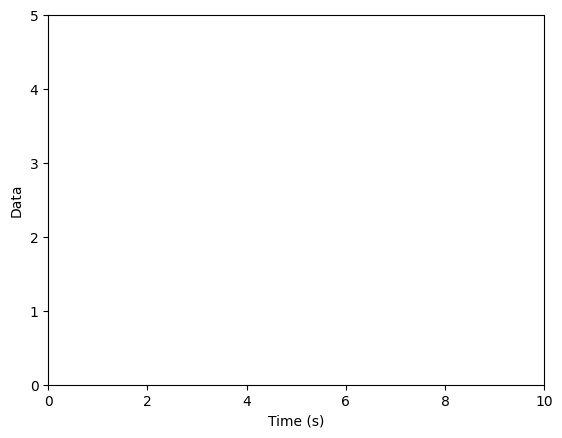

In [17]:
import dash
from dash import dcc, html
from dash.dependencies import Output, Input
import plotly.graph_objs as go
import random

# Initialize the Dash app
app = dash.Dash(__name__)

# Global list to store data
data_store = []

# Define the layout of the app
app.layout = html.Div(
    [
        html.H2("Live Graph"),
        dcc.Graph(id="live-graph", animate=True),
        dcc.Interval(id="graph-update", interval=100, n_intervals=0),
        dcc.Interval(id="store-update", interval=1000, n_intervals=0),
        dcc.Store(id="data-store", data=[]),  # Store for sending data
        html.Div(id='live-data', style={'display': 'none'})  # Hidden div for client-side callback
    ]
)

# Callback function to update the graph and data store
@app.callback(
    [Output("live-graph", "figure"),
     Output("data-store", "data")],
    [Input("graph-update", "n_intervals"),
     Input("store-update", "n_intervals")]
)
def update_graph_and_store(graph_n, store_n):
    # Append a new random value to the data_store
    new_value = random.randint(0, 100)
    data_store.append(new_value)

    # Keep only the last 100 values
    if len(data_store) > 100:
        data_store.pop(0)

    # Create x_data for the x-axis (last 100 indices)
    x_data = list(range(len(data_store)))
    y_data = data_store

    # Create the graph trace
    trace = go.Scatter(
        x=x_data,
        y=y_data,
        mode="lines",
        name="Data",
        line={"color": "rgb(168, 220, 209)"},
    )

    # Create the graph layout
    layout = go.Layout(
        title="Live Graph",
        xaxis=dict(range=[0, 99]),  # Fixed range for the last 100 values
        yaxis=dict(range=[0, 100]),  # Adjust as needed for y-axis
    )

    # Return the graph figure and updated store data
    return {"data": [trace], "layout": layout}, data_store[-100:]

# Client-side callback to update the graph based on the data in the store
app.clientside_callback(
    """
    function(data) {
        if (data && Array.isArray(data) && data.length) {
            const x_data = data.map((_, index) => index);
            const y_data = data;

            return {
                data: [{
                    x: x_data,
                    y: y_data,
                    mode: 'lines',
                    name: 'Data',
                    line: {color: 'rgb(168, 220, 209)'},
                }],
                layout: {
                    title: 'Live Graph',
                    xaxis: {range: [0, 99]},
                    yaxis: {range: [0, 100]},
                }
            };
        }
        return {'data': [], 'layout': {}};
    }
    """,
    Output('live-graph', 'figure'),
    Input('data-store', 'data')
)

if __name__ == "__main__":
    app.run_server(debug=True, port=8051)


/tmp/ipykernel_8234/4022420224.py:40: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



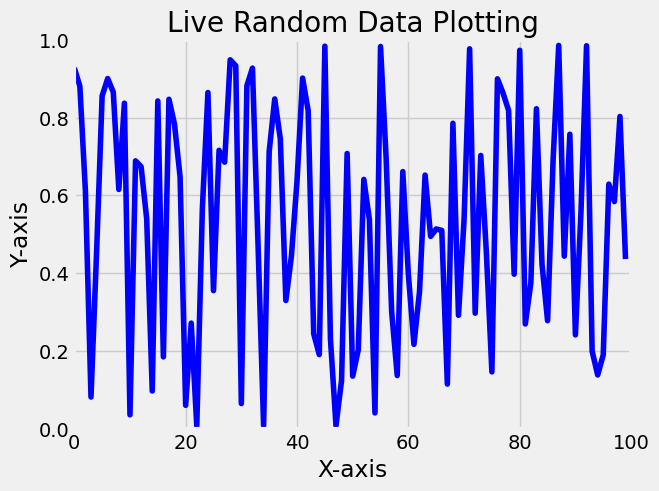

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and axis
fig, ax = plt.subplots()
xdata = np.arange(0, 100)
ydata = np.random.rand(100)

line, = ax.plot(xdata, ydata, color='blue')

# Set the limits and labels
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)
ax.set_title('Live Random Data Plotting')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Create a background for faster redrawing
background = fig.canvas.copy_from_bbox(ax.bbox)

def update(frame):
    global ydata
    # Update ydata with random values
    ydata = np.random.rand(100)

    # Restore the background
    fig.canvas.restore_region(background)

    # Update the line data
    line.set_ydata(ydata)

    # Draw the updated line
    ax.draw_artist(line)

    # Blit to display the update
    fig.canvas.blit(ax.bbox)

# Create an animation that updates every 100 ms
ani = FuncAnimation(fig, update, interval=100)

# Show the plot
plt.show()
